Q2) Perform 5 data visualization tasks on the student performance dataset given in the link below (create
5 different visualizations). Explain what kind analysis has become easier with each of the visualizations.
Create the folder structure for this question similar to question 1. (15 points).
Data link: https://app.box.com/s/ji910ez3ycw137rw07xnhielxey7ww41











In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1 : Data table is saved as csv and named file as "raw_data.csv". Placed under folder "data_raw"


Step 2 : cleaning the data.

In [ ]:
import pandas as pd
df_raw_data=pd.read_csv('/content/drive/MyDrive/PDS/Assignment1/Q2/raw_data/StudentsPerformance.csv')
df_raw_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df_raw_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df_raw_data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df_raw_data.rename(columns = {'race/ethnicity':'race_or_ethnicity',
                     'parental level of education':'parental_level_of_education',
    'test preparation course':'test_preparation_course',
                       'math score':'math_score',
                       'reading score':'reading_score',
                        'writing score':'writing_score'}, inplace = True)

In [ ]:
#save the clean file to data_clean
df_raw_data.to_csv('/content/drive/MyDrive/PDS/Assignment1/Q2/clean_data/clean_data_StudentsPerformance.csv')
df_clean_data = df_raw_data
df_clean_data

,gender,race_or_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Step 3 : Exploratory Data Analysis

Visualisation 1 : Bar chart of No of students based on Race/Ethnicity and Lunch Status

<Figure size 1000x600 with 0 Axes>

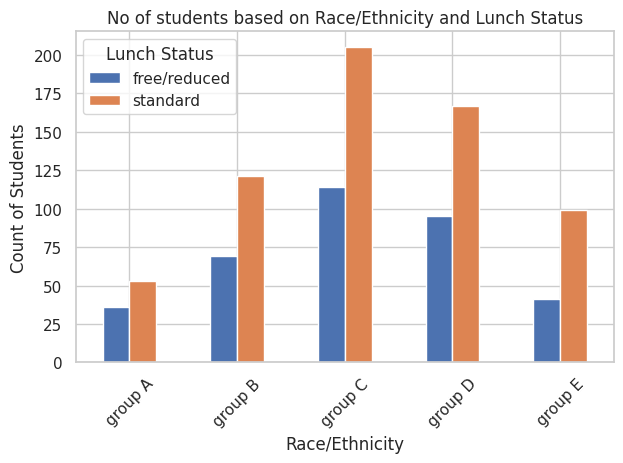

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by race/ethnicity and lunch, and counting the occurrences
grouped_data = df_clean_data.groupby(['race_or_ethnicity', 'lunch']).size().unstack()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=False)
plt.title('No of students based on Race/Ethnicity and Lunch Status')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count of Students')
plt.xticks(rotation=45)
plt.legend(title='Lunch Status')
plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
plt.savefig('/content/drive/MyDrive/PDS/Assignment1/Q2/result/students_race_lunch_status.png', format='png')

# Display the plot
plt.show()


Visualisation 2: Piechart based on parental level of education

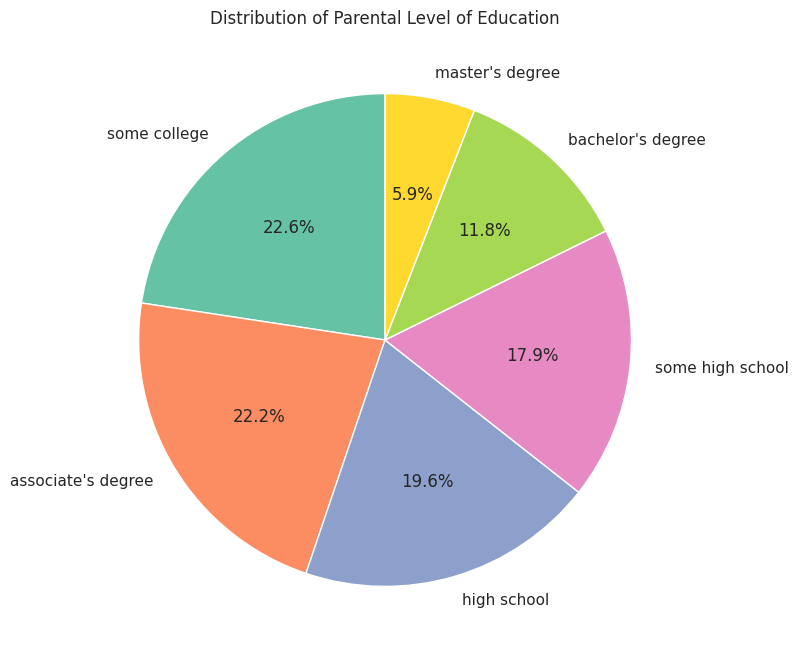

In [ ]:
# Group by 'parental level of education' and calculate the count for each level
education_distribution = df_clean_data['parental_level_of_education'].value_counts()

# Set plot size
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(education_distribution,
        labels=education_distribution.index,
        autopct='%1.1f%%',    # Display percentage on the pie
        startangle=90,        # Start pie chart at 90 degrees
        colors=sns.color_palette('Set2'))  # Set color palette

# Add title
plt.title('Distribution of Parental Level of Education')

# Save the plot to a file (e.g., pie_chart.png)
plt.savefig('/content/drive/MyDrive/PDS/Assignment1/Q2/result/pie_chart.png', format='png')

# Show the plot
plt.show()


Visualisation 3 : Distribution of math score vs reading score vs writing score by gender

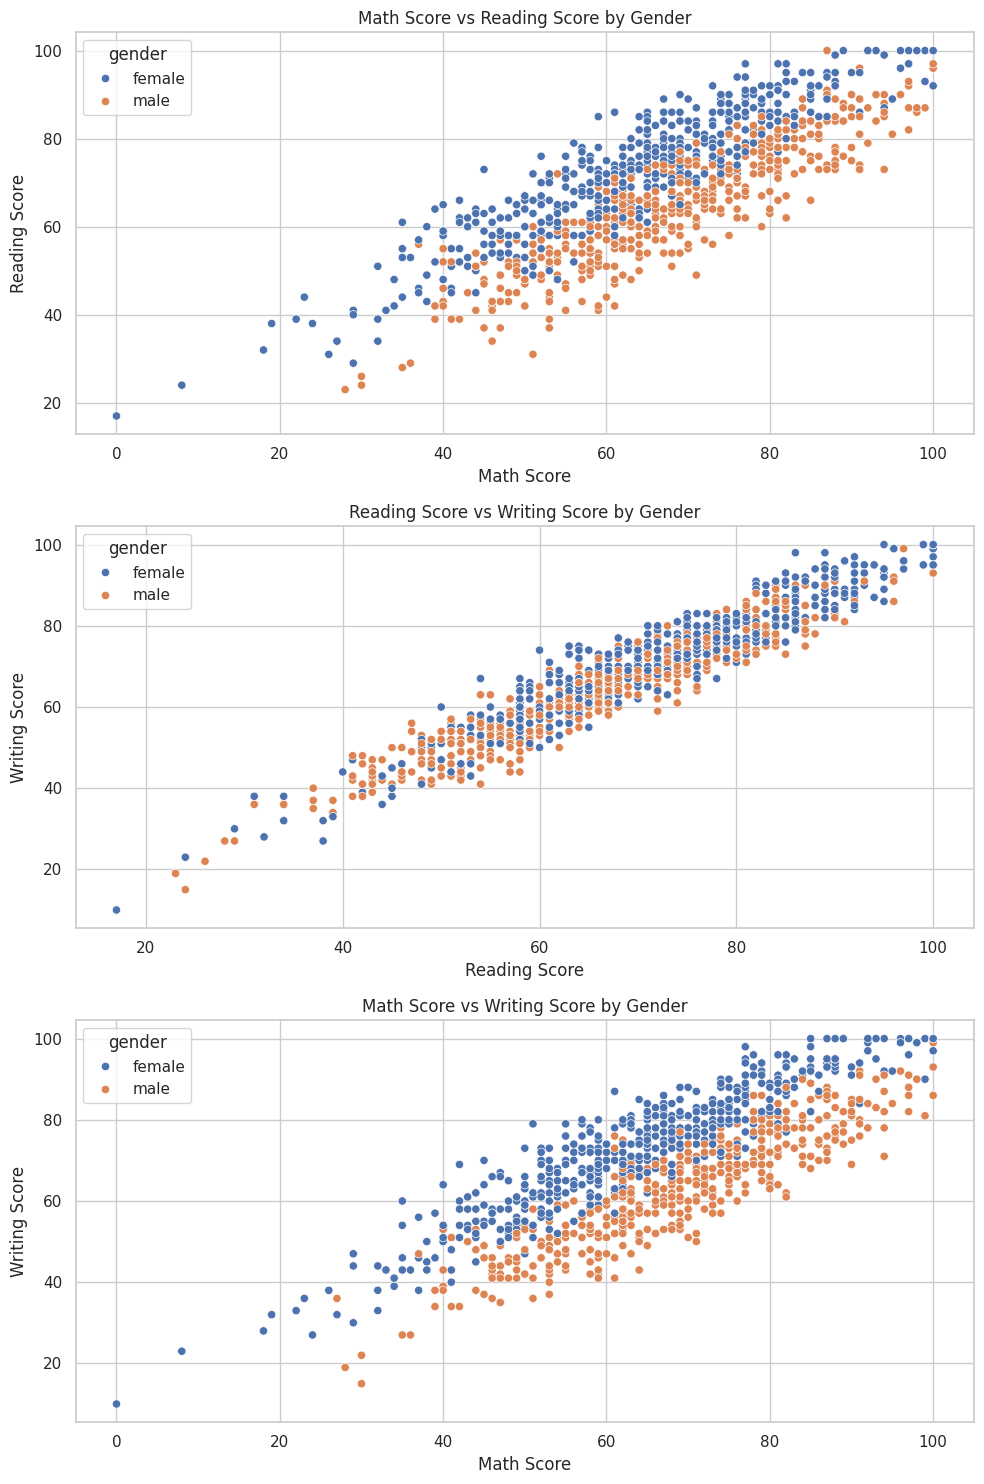

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create subplots for scatter plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Scatter plot for Math Score
sns.scatterplot(data=df_clean_data, x='math_score', y='reading_score', hue='gender', ax=axs[0])
axs[0].set_title('Math Score vs Reading Score by Gender')
axs[0].set_xlabel('Math Score')
axs[0].set_ylabel('Reading Score')

# Scatter plot for Reading Score
sns.scatterplot(data=df_clean_data, x='reading_score', y='writing_score', hue='gender', ax=axs[1])
axs[1].set_title('Reading Score vs Writing Score by Gender')
axs[1].set_xlabel('Reading Score')
axs[1].set_ylabel('Writing Score')

# Scatter plot for Writing Score
sns.scatterplot(data=df_clean_data, x='math_score', y='writing_score', hue='gender', ax=axs[2])
axs[2].set_title('Math Score vs Writing Score by Gender')
axs[2].set_xlabel('Math Score')
axs[2].set_ylabel('Writing Score')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure to a file
plt.savefig('/content/drive/MyDrive/PDS/Assignment1/Q2/result/scatter_plots_by_gender.png', dpi=300)  # Saving as PNG file with high resolution (300 dpi)
# You can also save as PDF or other formats by changing the extension: 'scatter_plots_by_gender.pdf'

# Show the plots
plt.show()


Visualisation 4 : Histogram of Top 20 Students based on average Scores

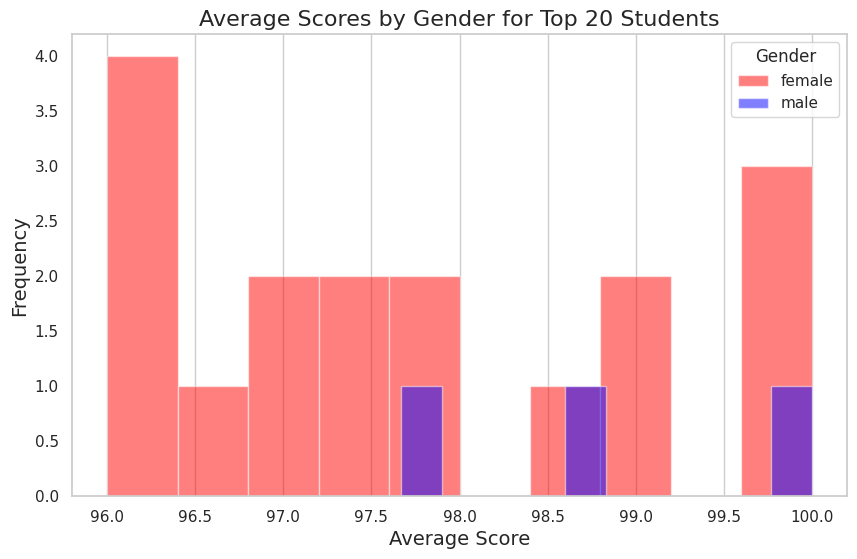

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_clean_data is your DataFrame with cleaned data
df_clean_data['average_score'] = (df_clean_data['math_score'] + df_clean_data['reading_score'] + df_clean_data['writing_score']) / 3

# Rank the students based on the average score
top_students = df_clean_data.nlargest(20, 'average_score')

# Select relevant columns including gender
top_students = top_students[['gender', 'average_score']]

# Save the top_students DataFrame to a CSV file
top_students.to_csv('top_students.csv', index=False)  # Save as CSV file
# Alternatively, to save as Excel:
# top_students.to_excel('top_students.xlsx', index=False)

# Create a histogram
plt.figure(figsize=(10, 6))
colors = {'female': 'red', 'male': 'blue'}

for gender in top_students['gender'].unique():
    plt.hist(top_students[top_students['gender'] == gender]['average_score'],
             alpha=0.5,
             label=gender,
             bins=10,
             color=colors[gender])

plt.title('Average Scores by Gender for Top 20 Students', fontsize=16)
plt.xlabel('Average Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Gender')
plt.grid(axis='y')

# Save the plot to an image file (PNG)
plt.savefig('/content/drive/MyDrive/PDS/Assignment1/Q2/result/average_scores_histogram.png')  # You can also save as 'jpg', 'pdf', etc.

# Display the plot
plt.show()


Visualisation 5:Box Plot for overall score based on parental level of education


<ipython-input-26-40c7cb3a89d3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean_data, y='overall_score', x='parental_level_of_education', palette='pastel')


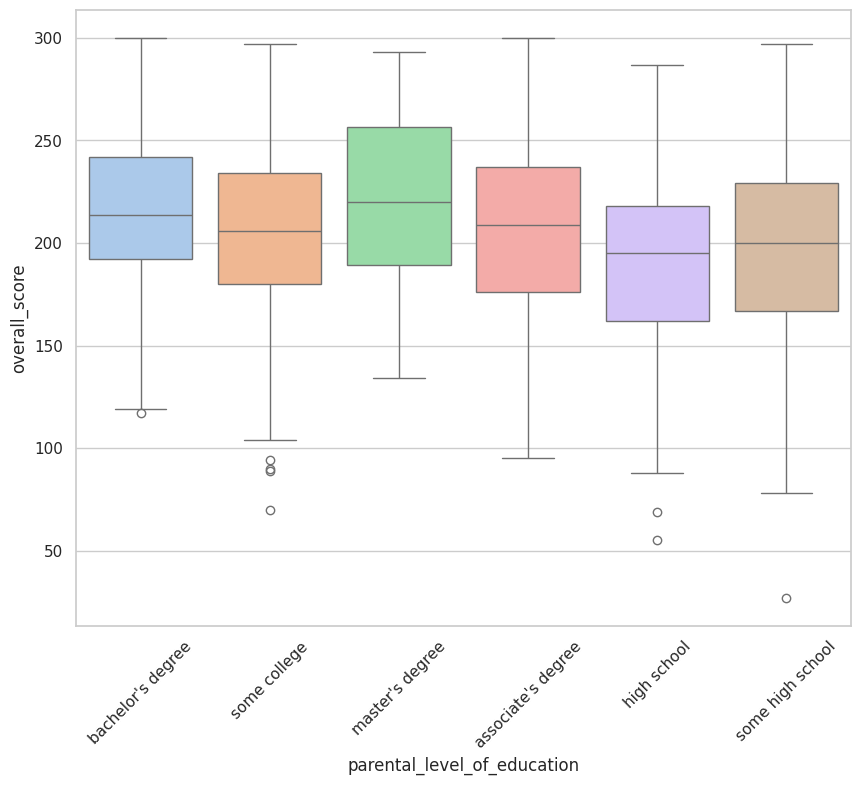

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_clean_data is your dataframe
# Create a new column for the overall score
df_clean_data['overall_score'] = df_clean_data['math_score'] + df_clean_data['reading_score'] + df_clean_data['writing_score']

# Create the figure and boxplot
fig = plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)

# Create the boxplot
sns.boxplot(data=df_clean_data, y='overall_score', x='parental_level_of_education', palette='pastel')

# Save the figure to a file
output_file = '/content/drive/MyDrive/PDS/Assignment1/Q2/result/result_boxplot.png'  # You can also use other formats like 'result_boxplot.pdf'
plt.savefig(output_file, bbox_inches='tight')

# Display the plot (optional, can be omitted if only saving)
plt.show()


Visualisation 6 : Line Graph Average Scores by Gender and Parental Education Level

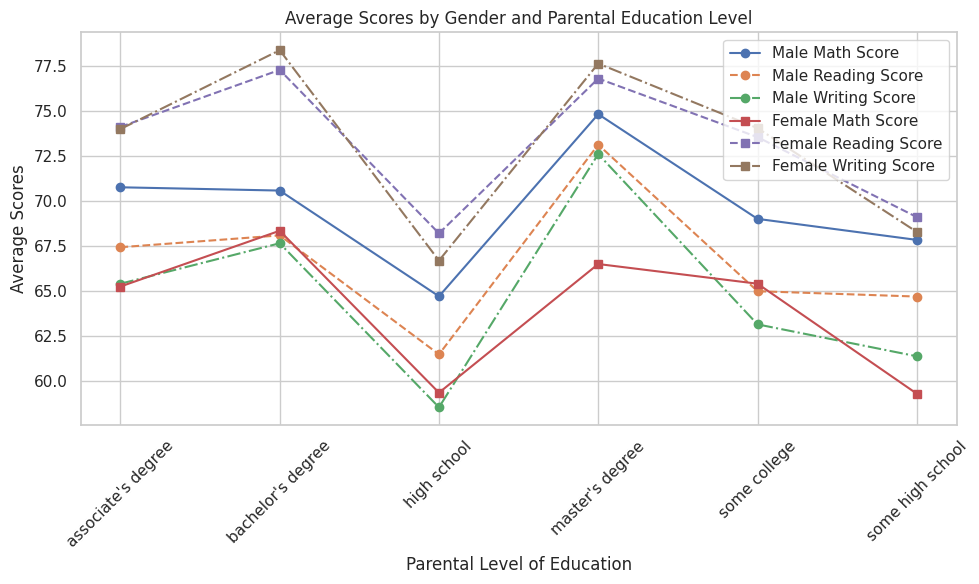

In [ ]:
# Group by gender and parental_level_of_education, and calculate mean for numeric columns
grouped_df = df_clean_data.groupby(['gender', 'parental_level_of_education'])[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Filter by gender
male_data = grouped_df[grouped_df['gender'] == 'male']
female_data = grouped_df[grouped_df['gender'] == 'female']

# Plot line graph for each score (math, reading, writing) for male and female
plt.plot(male_data['parental_level_of_education'], male_data['math_score'], marker='o', label='Male Math Score', linestyle='-')
plt.plot(male_data['parental_level_of_education'], male_data['reading_score'], marker='o', label='Male Reading Score', linestyle='--')
plt.plot(male_data['parental_level_of_education'], male_data['writing_score'], marker='o', label='Male Writing Score', linestyle='-.')

plt.plot(female_data['parental_level_of_education'], female_data['math_score'], marker='s', label='Female Math Score', linestyle='-')
plt.plot(female_data['parental_level_of_education'], female_data['reading_score'], marker='s', label='Female Reading Score', linestyle='--')
plt.plot(female_data['parental_level_of_education'], female_data['writing_score'], marker='s', label='Female Writing Score', linestyle='-.')

# Add titles and labels
plt.title('Average Scores by Gender and Parental Education Level')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Scores')
plt.xticks(rotation=45)
plt.legend()

# Save the figure
plt.tight_layout()

# Save output as a PNG file
plt.savefig('/content/drive/MyDrive/PDS/Assignment1/Q2/result/Linegraph_gender_education_scores.png')

# Save as PDF if preferred
# plt.savefig('gender_education_scores.pdf')

# Display the plot
plt.show()


Explanation:

1)Bar Chart (Race/Ethnicity & Lunch Status): Shows how students are grouped by race and lunch type (standard or free/reduced), helping spot patterns

2)Pie Chart (Parental Education): Breaks down the education level of students' parents, making it easy to see the most common levels.

3)Distribution Plot (Math, Reading, Writing by Gender): Compares how male and female perform in math, reading, and writing to see differences and similarities.

4)Histogram (Top 20 Students): Shows how the top 20 students' scores are spread, highlighting the highest achievers.

5)Box Plot (Scores by Parental Education): Shows the range of scores based on parental education, helping to see if certain backgrounds lead to higher or lower scores.

6)Line Graph (Gender & Parental Education): Tracks how male and female scores change with different levels of parental education, revealing trends and differences.